# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Rifqi Nur Aziz
- **Email:** m295b4ky3045@bangkit.academy
- **ID Dicoding:** muhammad_rifqi_nur_aziz_m295b4ky3045_t328

## Menentukan Pertanyaan Bisnis

- Adakah korelasi antara jumlah penyewaan dengan kondisi cuaca?
- Bagaimana tren pengguna sepeda selama dua tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [2]:
!pip install streamlit babel

In [6]:
!pip install matplotlib

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency

## Data Wrangling

### Gathering Data

In [12]:
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

In [14]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- terlihat pada data terdapat beberapa parameter seperti hari libur, hari kerja, cuaca dan lainnya
- 

### Assessing Data

In [24]:
df_day.info()
print("Jumlah duplikasi: ", df_day.duplicated().sum())
print("Jumlah data yang hilang: ", df_day.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0
Jumlah data yang hilang:  instant       0
dteday        0
season        

In [26]:
df_hour.info()
print("Jumlah duplikasi: ", df_hour.duplicated().sum())
print("Jumlah data yang hilang: ", df_hour.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0
Jumlah data yang hilang:  in

In [28]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [30]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- pada data "day.csv" merupakan data yang diambil selama 2 tahun, dengan total 731 data. Nilai terbanyak pada kolom "cnt" sebesar 8714 orang yang menyewa sepeda. sementara itu nilai terkecil sebanyak 22 orang. Maka rata-rata dari kolom "cnt" sebesar 4505,348. Hal ini menandakan bahwa bike rental sharing cukup ramai diminati 
- pada data "hour.csv" merupakan catatan data dengan presisi waktu yang lebih kecil, yaitu dalam jam. terlihat bahwa rata-rata peminjaman sepeda per-jamnya adalah 189,463

### Cleaning Data

In [36]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    df_day[column] = pd.to_datetime(df_day[column])

In [40]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [42]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    df_hour[column] = pd.to_datetime(df_hour[column])

In [44]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- terlihat pada data "day.csv" & "hour.csv" terdapat kesalahan tipe data yaitu pada kolom "dteday" dengan format object
- seharusnya pada kolom tersebut datanya harus berupa string datetime agar mudah dilakukan pengolahan data. maka diperlukan perbaikan tipe data dengan memanfaatkan fungsi yang terdapat library pandas.

## Exploratory Data Analysis (EDA)

### Explore ...

In [46]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [48]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- berdasarkan rangkuman parameter statistik pada data "day.csv", kita memperoleh informasi jumlah pelanggan sebanyak 731 pelanggan selama 2 tahun. Pemesanan terendah yaitu 22 orang dan pemesanan tertinggi dapat mencapai 8714 orang
- data pada "hour.csv" merupakan data dengan skala yang lebih kecil, yaitu berdasarkan jam. berdasarkan rangkuman parameter statistik pada data "hour.csv", kita memperoleh informasi jumlah pelanggan sebanyak 17379 pelanggan selama 2 tahun. Pemesanan terendah yaitu 1 orang dalam satu jam dan pemesanan tertinggi dapat mencapai 977 orang dalam satu jam

## Visualization & Explanatory Analysis

### Pertanyaan 1:

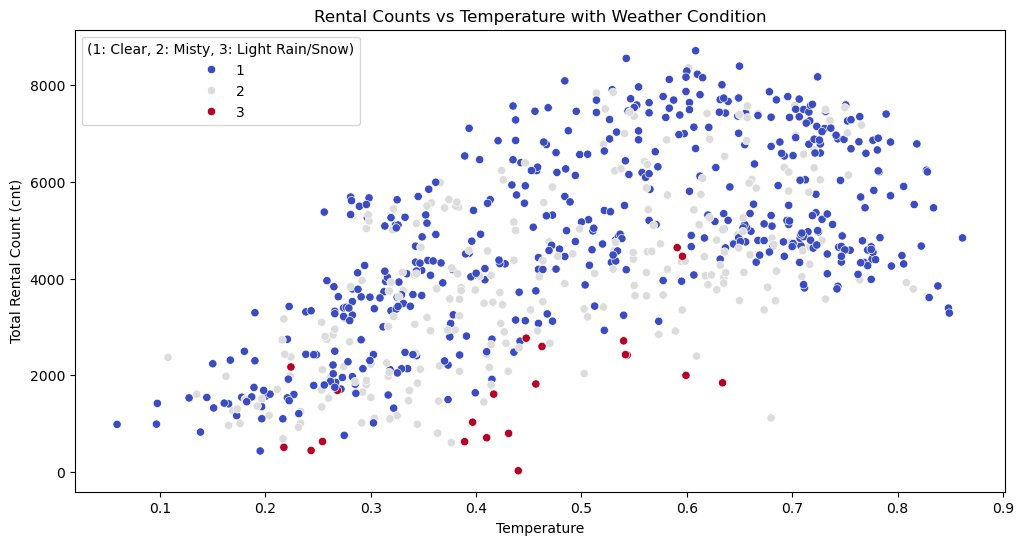

In [72]:
# Scatter plot to show relationship between temperature and rental count with weather condition as hue
plt.figure(figsize=(12, 6))

# Scatter plot with linear regression line
sns.scatterplot(x='temp', y='cnt', hue='weathersit', palette='coolwarm', data=df_day)
plt.title('Rental Counts vs Temperature with Weather Condition')
plt.xlabel('Temperature')
plt.ylabel('Total Rental Count (cnt)')
plt.legend(title='(1: Clear, 2: Misty, 3: Light Rain/Snow)')
plt.show()


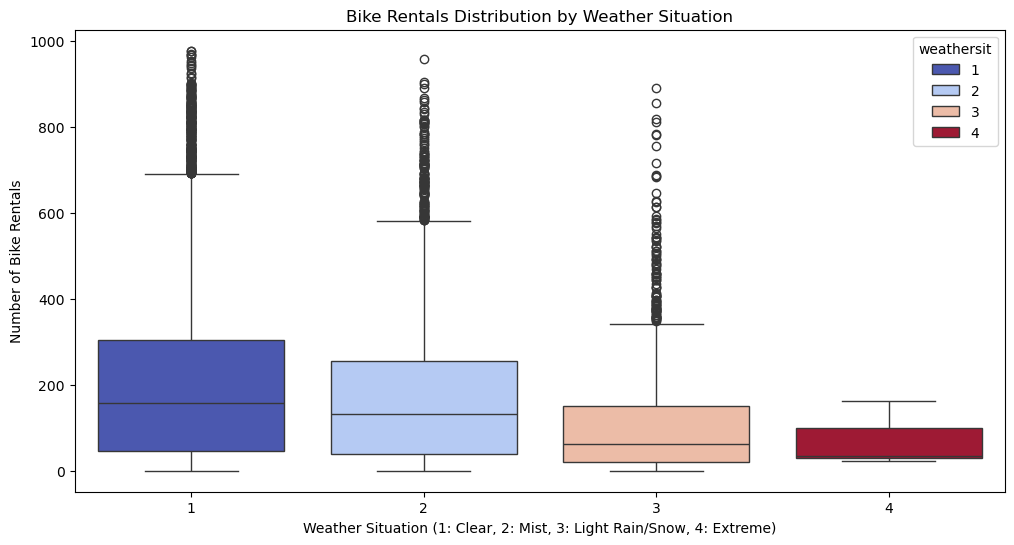

In [86]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weathersit', y='cnt', hue='weathersit', palette='coolwarm', data=df_hour)
plt.title('Bike Rentals Distribution by Weather Situation')
plt.xlabel('Weather Situation (1: Clear, 2: Mist, 3: Light Rain/Snow, 4: Extreme)')
plt.ylabel('Number of Bike Rentals')
plt.show()

### Pertanyaan 2:

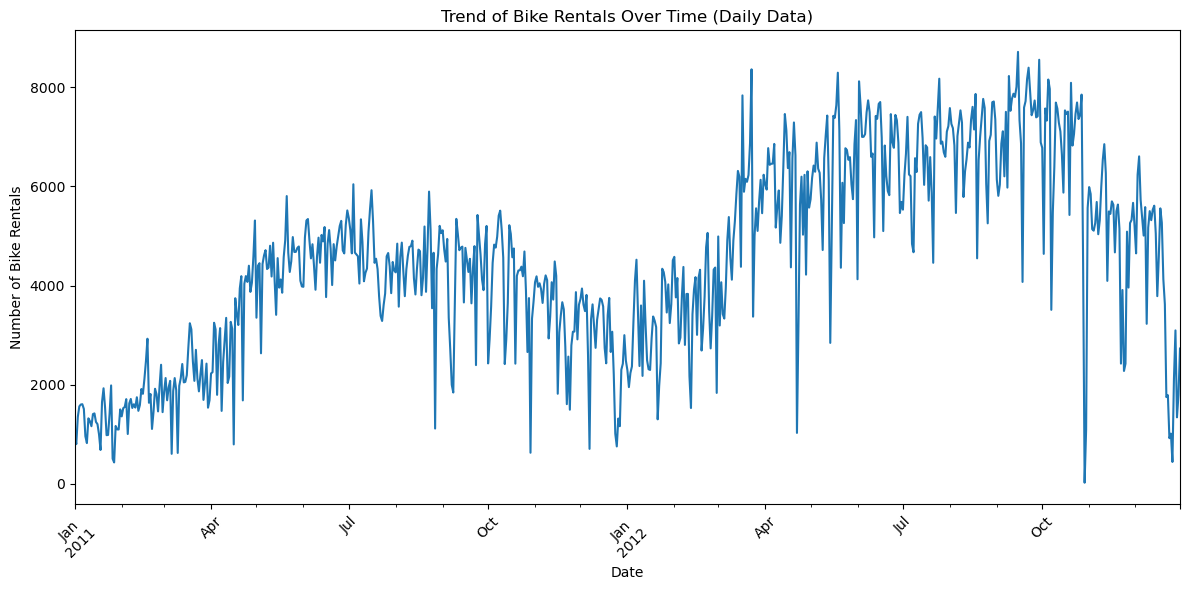

In [90]:
plt.figure(figsize=(12,6))
df_day.groupby('dteday')['cnt'].sum().plot()
plt.title('Trend of Bike Rentals Over Time (Daily Data)')
plt.xlabel('Date')
plt.ylabel('Number of Bike Rentals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

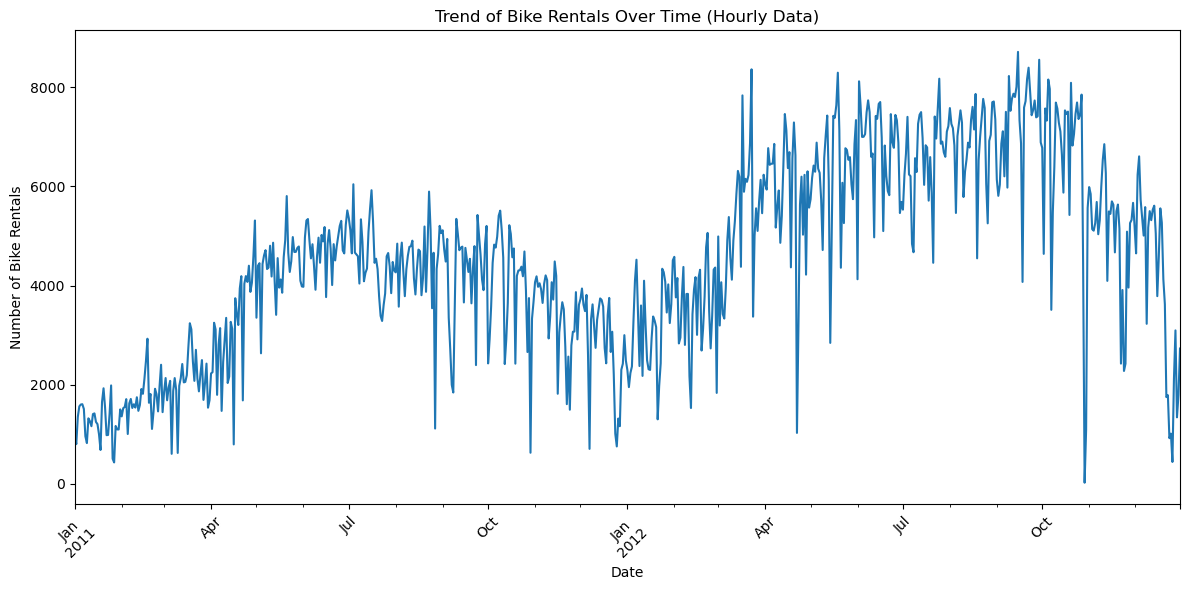

In [92]:
plt.figure(figsize=(12,6))
df_hour.groupby('dteday')['cnt'].sum().plot()
plt.title('Trend of Bike Rentals Over Time (Hourly Data)')
plt.xlabel('Date')
plt.ylabel('Number of Bike Rentals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

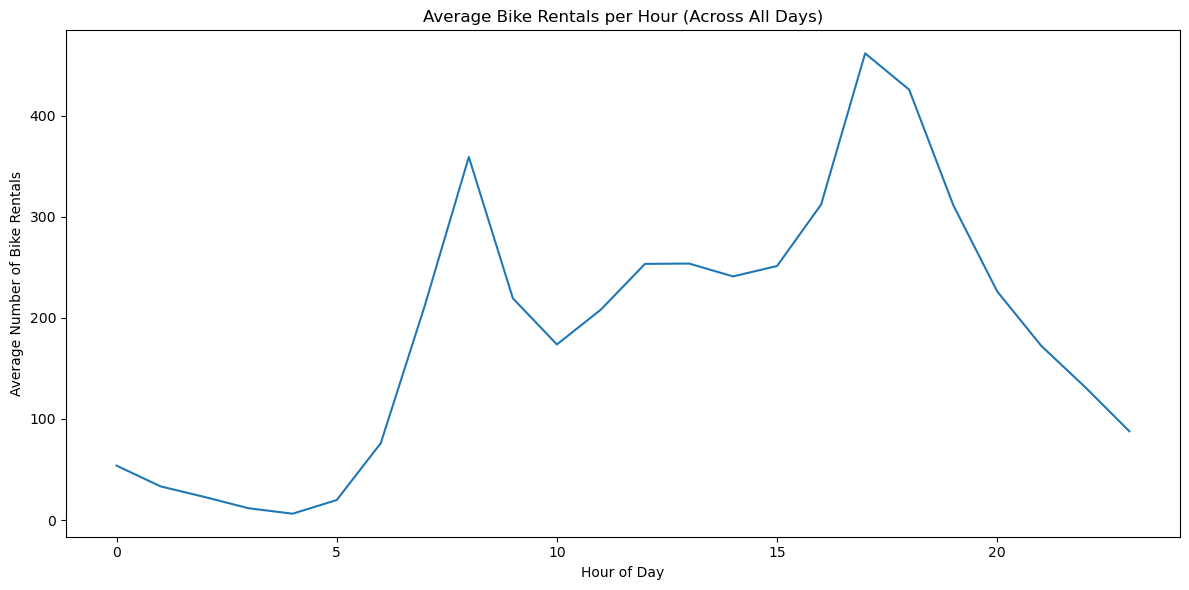

In [96]:
plt.figure(figsize=(12,6))
df_hour.groupby('hr')['cnt'].mean().plot()
plt.title('Average Bike Rentals per Hour (Across All Days)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Bike Rentals')
plt.xticks()
plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan visualisasi 2 grafik awal terlihat korelasi antara jumlah pengguna dengan faktor cuaca dan temperatur. Dengan kondisi cuaca dan temperatur yang normal dapat meningkatkan minat pengguna untuk bersepeda. Sebaliknya, dalam kondisi cuaca yang buruk tentunya dapat mengurangi minat pengguna untuk menyewa sepeda (Jawaban analisis untuk pertanyaan nomor 1)
- Berdasarkan visualisasi 3 grafik terakhir dapat terlihat tren yang terjadi pada "bike sharing" selama 2011-2012. Grafik yang cukup fluktuatif. Hal ini dapat disebabkan oleh banyak faktor, seperti misalnya kondisi cuaca, kecepatan angin, temperatur, atau bahkan hari kerja dan hari libur juga dapat mempengaruhi minat pengguna

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan pertanyaan analisis pertama dan visualisasi yang telah dibuat, dapat disimpulkan bahwa korelasi antara jumlah pengguna dengan kondisi cuaca sangat mempengaruhi. pada kondisi cuaca/suhu yang normal, jumlah pengguna dapat mencapai nilai maksimum. Sedangkan pada kondisi cuaca/suhu yang kurang pas, jumlah pengguna cenderung lebih sedikit
- Berdasarkan pertanyaan analisis kedua dan visualisasi data yang telah dibuat, dapat disimpulkan bahwa tren penggunaan rental sepeda ini cenderung fluktuatif yang mungkin dapat disebabkan karena musim sehingga mempengaruhi cuaca dan suhu. Selain itu, jika dilihat melalui data per jamnya, pengguna cenderung menyewa sepeda pada jam-jam yang tepat untuk berolahraga yaitu sekitar jam 06.00-08.00 serta di jam 15.00 - 17.00

In [100]:
df_day.to_csv("all_dayData.csv", index=False)
df_hour.to_csv("all_hourData.csv", index=False)